# **Real Estate Markets and Property Valuations**

# **Description:**

This dataset contains various features of residential properties along with their corresponding prices. It is suitable for exploring and analyzing factors influencing housing prices and for building predictive models to estimate the price of a property based on its attributes.

# **METADATA**
> price: The price of the property.

> area: The total area of the property in square feet.

> bedrooms: The number of bedrooms in the property.

> bathrooms: The number of bathrooms in the property.

> stories: The number of stories (floors) in the property.

> mainroad: Indicates whether the property is located on a main road (binary: yes/no).

> guestroom: Indicates whether the property has a guest room (binary: yes/no).

> basement: Indicates whether the property has a basement (binary: yes/no).

> hotwaterheating: Indicates whether the property has hot water heating (binary: yes/no).

> airconditioning: Indicates whether the property has air conditioning (binary: yes/no).

> parking: The number of parking spaces available with the property.

> prefarea: Indicates whether the property is in a preferred area (binary: yes/no).

> furnishingstatus: The furnishing status of the property (e.g., furnished, semi-furnished, unfurnished).

> Total_rooms : The number of rooms

# **Usage:**

- This dataset can be used for exploratory data analysis to understand the relationships between different housing features and prices.

- It can also be used to build machine learning models for predicting housing prices based on the given features.

**GOALS:**

Q1: Relation between Price and mainroad access 

Q2: Distribution of furnishing status of houses 

Q3: Average House Price by Hot Water Heating and Air Conditioning

Q4: Frequency of numbers of bedroom and bathroom 

Q5: Relation between price and area

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

In [5]:
# Load Data from csv using pandas to jupyterlab
df = pd.read_csv('Housing_Price_Data.csv')

In [24]:
# Data Overview
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Total rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,4


In [25]:
# Data Information Cheking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  Total rooms       545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


**Afte checking the dataset and metadata i think there is no datatype mistake.So i can continue to the next step for adding new column total rooms, Duplicated values checking and checking-handling missing values.**

In [9]:
# Calculate the total number of rooms in the house
df ['Total rooms'] = df['bedrooms'] + df['bathrooms']
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Total rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,4


In [10]:
#Calculate the number of duplicated rows
df.duplicated().sum()

0

In [11]:
#Check for missing/ null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
Total rooms         0
dtype: int64

In [26]:
# Sort data houses based on the prices in ascending order
df.sort_values(by = 'price', ascending = True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Total rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,3
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,4
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,3
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,4


<function matplotlib.pyplot.show(close=None, block=None)>

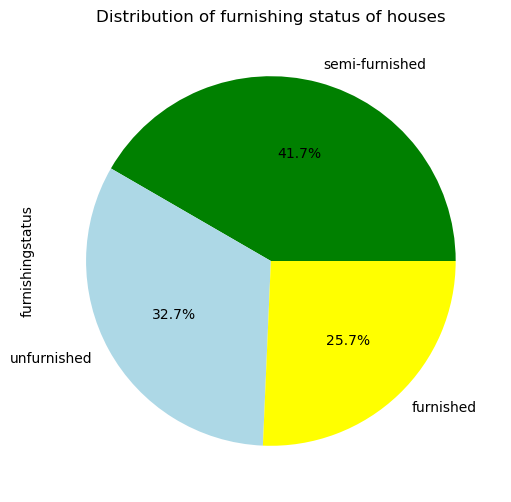

In [27]:
# Distribution of "furnishingstatus" between houses
plt.figure(figsize = (10,6))
df['furnishingstatus'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors = ['green', 'lightblue', 'yellow'])
plt.title('Distribution of furnishing status of houses')
plt.show

**From pie chart above we can conclude that most of houses or about 41.7% have status semi furnished, 32.7% Unfurnished, 25.7 furnished.So, we can say furnished houses have smallest number or ratio at all and sem-furnished have biggest ration.**

<function matplotlib.pyplot.show(close=None, block=None)>

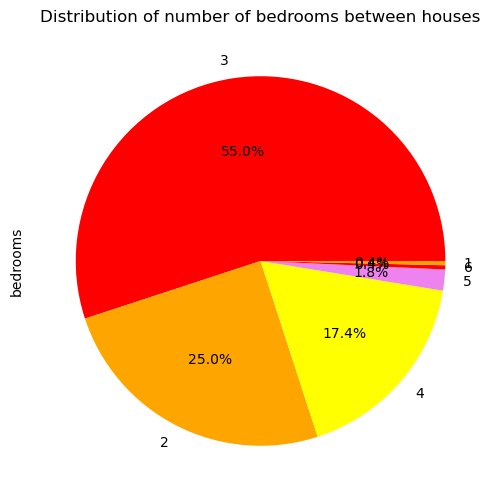

In [28]:
# Distribution of 'bedrooms' between houses
plt.figure(figsize = (10,6))
df['bedrooms'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors = ['red', 'orange', 'yellow', 'violet'])
plt.title('Distribution of number of bedrooms between houses')
plt.show

**From the chart we can see that 55% houses have 3 bedrooms,25% houses have 2 bedrooms, and the remain 4,5,6,1 bedroom.so we can conclude most of the houses have 3 bedroom.**

<function matplotlib.pyplot.show(close=None, block=None)>

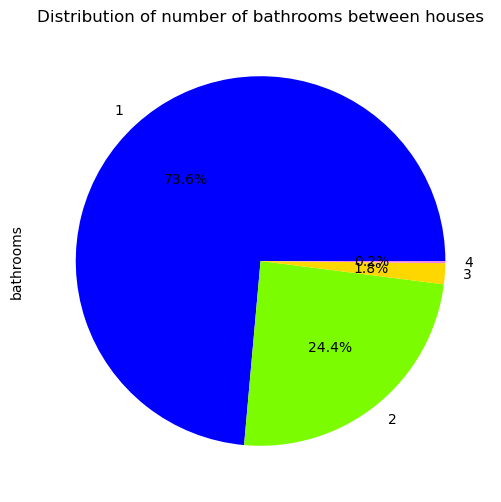

In [29]:
# Distribution of number of bathrooms between houses
plt.figure(figsize = (10,6))
df['bathrooms'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors = ['blue', 'lawngreen', 'gold', 'violet'])
plt.title('Distribution of number of bathrooms between houses')
plt.show

**From the chart we can see that 73.6% houses have 1 bathrooms,24.4% houses have 2 bathrooms, and the remain 4,3 bathroom.so we can conclude most of the houses have 1 bathroom.**

<function matplotlib.pyplot.show(close=None, block=None)>

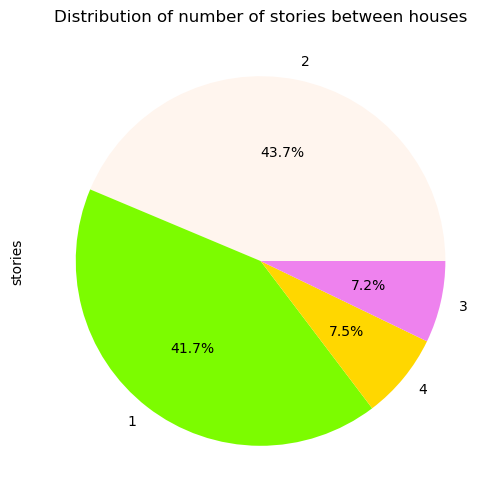

In [16]:
# Distribution of number of stories between houses
plt.figure(figsize = (10,6))
df['stories'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', colors = ['seashell', 'lawngreen', 'gold', 'violet'])
plt.title('Distribution of number of stories between houses')
plt.show

**From the chart we can see that 43.7% houses have 2 floors,41.7% houses have 1 floor, and the remain 3,4 floor.so we can conclude most of the houses have 2 floor.**

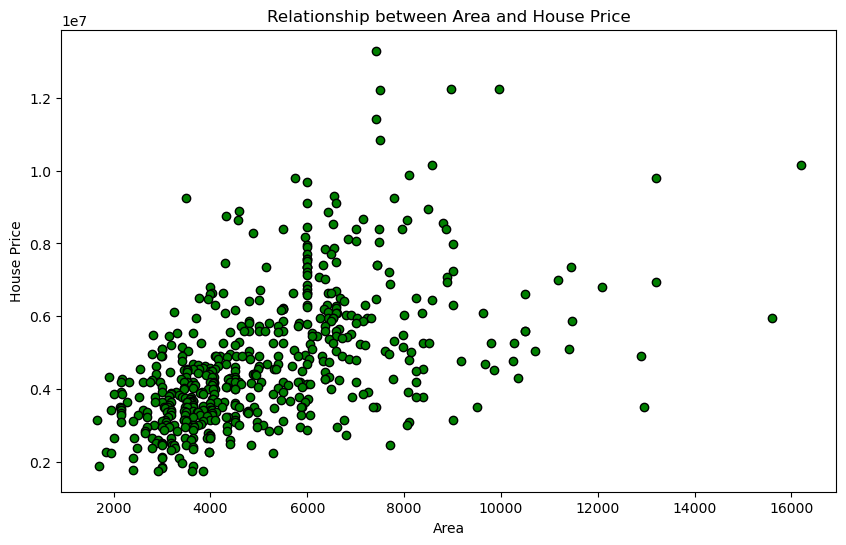

In [31]:
# Relationship between the area and house price
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], color = 'green', edgecolor = 'black')
plt.xlabel('Area')
plt.ylabel('House Price')
plt.title('Relationship between Area and House Price')
plt.show()

**from the scatterplot, we can see most of the houses in the area 4000 m^2 with the house price 0.4.**

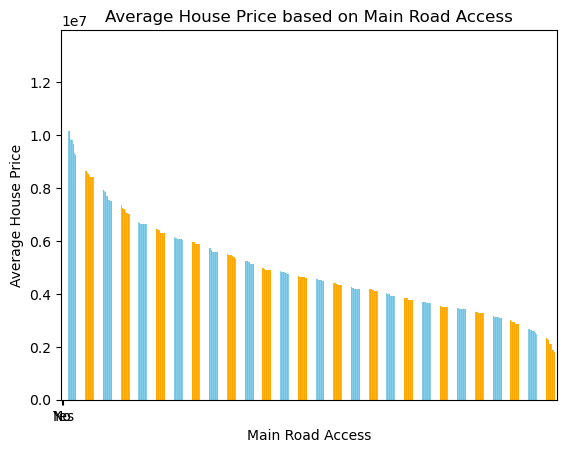

In [19]:
#fix (barchart)

# Group the data by 'mainroad'
grouped = df.groupby('mainroad')['price']

# Plot the bar chart
grouped.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Main Road Access')
plt.ylabel('Average House Price')
plt.title('Average House Price based on Main Road Access')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

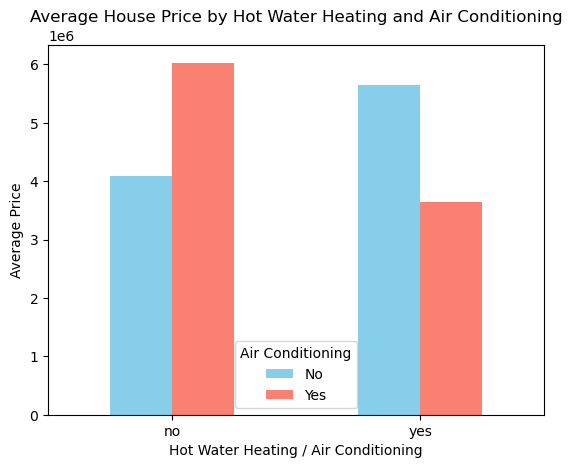

In [20]:
# Group by 'hotwaterheating' and 'airconditioning' and calculate the average price
grouped_data = df.groupby(['hotwaterheating', 'airconditioning'])['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
grouped_data.unstack().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Hot Water Heating / Air Conditioning')
plt.ylabel('Average Price')
plt.title('Average House Price by Hot Water Heating and Air Conditioning')
plt.legend(title='Air Conditioning', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

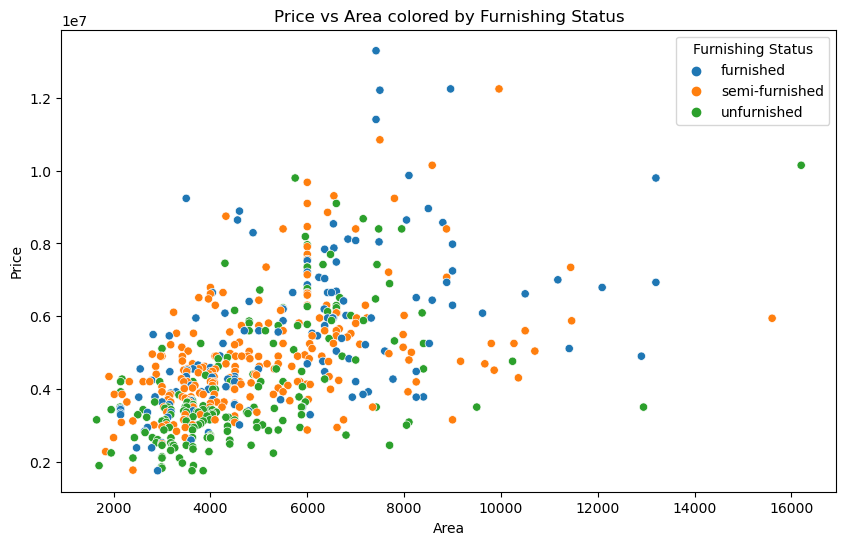

Correlation between Price and Area:
          price      area
price  1.000000  0.535997
area   0.535997  1.000000


In [21]:
# Scatter plot of Price vs Area colored by FurnishingStatus
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=df)
plt.title('Price vs Area colored by Furnishing Status')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Furnishing Status')
plt.show()

# Statistical analysis (example: correlation)
correlation = df[['price', 'area']].corr()
print('Correlation between Price and Area:')
print(correlation)

**The correlation Between variable price and area has values 0,53.As i know the correlation can be said strong when the correlatin values more than 0,6.So i think the correlation between price and area not too strong.** 

In [22]:
# Avg price of the house based on the number of rooms
avg_price = df.groupby('Total rooms')['price'].mean()
avg_price

Total rooms
2    2.712500e+06
3    3.596852e+06
4    4.454218e+06
5    5.764679e+06
6    6.293688e+06
7    6.013778e+06
8    8.730750e+06
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

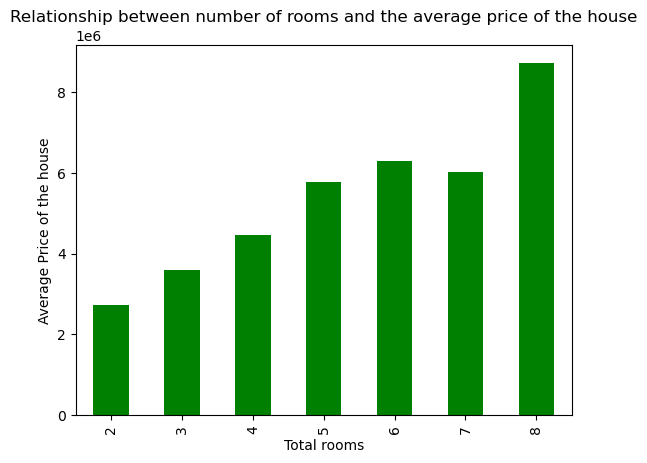

In [30]:
# Relationship between number of rooms and average price of the house
avg_price.plot(kind = 'bar', color = 'green')
plt.title('Relationship between number of rooms and the average price of the house')
plt.ylabel('Average Price of the house')
plt.show

**When the houses has more rooms, the price of the rooms is more expensive**